In [1]:
import os
import numpy as np
from astropy.table import Table, vstack, join
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib import patches
from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams["axes.grid"]   = False
rcParams["xtick.labelsize"] = 13
rcParams["ytick.labelsize"] = 13

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
font = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 14}

from scipy.stats import linregress

from matplotlib.legend_handler import HandlerLine2D

In [2]:
# Complete Cantat-Gaudin+2020 (members + structural parameters)
Cantat_table = Table.read("data/Cantat-Gaudin2020_joint_CMD.fits")
Cantat_table["Cluster_1"] = [np.char.strip(a, ' ') for a in Cantat_table["Cluster_1"]]
print(Cantat_table)

RA_ICRS_1 DE_ICRS_1        GaiaDR2       ... _DE_icrs_2 GroupID GroupSize
   deg       deg                         ...    deg                      
--------- ---------- ------------------- ... ---------- ------- ---------
 58.14384   11.26075   36629890579758592 ...    16.9481       1       515
59.560425  12.627971   38329666836450304 ...    16.9481       1       515
58.756584  12.485542   38354680725946240 ...    16.9481       1       515
58.444378  13.391927   38670343642226816 ...    16.9481       1       515
60.187866  13.906263   38929141191925760 ...    16.9481       1       515
60.926003  14.991222   39305036729495936 ...    16.9481       1       515
58.722355  16.315523   40470720915966208 ...    16.9481       1       515
 53.14434  16.153265   42716408993806080 ...    16.9481       1       515
58.777752  16.998373   43538293935879680 ...    16.9481       1       515
58.292507   17.32696   43615122310787840 ...    16.9481       1       515
      ...        ...                 .

In [3]:
Cantat_table_nearer_1point5kpc = Cantat_table[ Cantat_table["DistPc"] <= 1500. ]
print(Cantat_table_nearer_1point5kpc)

RA_ICRS_1 DE_ICRS_1        GaiaDR2       ... _DE_icrs_2 GroupID GroupSize
   deg       deg                         ...    deg                      
--------- ---------- ------------------- ... ---------- ------- ---------
 58.14384   11.26075   36629890579758592 ...    16.9481       1       515
59.560425  12.627971   38329666836450304 ...    16.9481       1       515
58.756584  12.485542   38354680725946240 ...    16.9481       1       515
58.444378  13.391927   38670343642226816 ...    16.9481       1       515
60.187866  13.906263   38929141191925760 ...    16.9481       1       515
60.926003  14.991222   39305036729495936 ...    16.9481       1       515
58.722355  16.315523   40470720915966208 ...    16.9481       1       515
 53.14434  16.153265   42716408993806080 ...    16.9481       1       515
58.777752  16.998373   43538293935879680 ...    16.9481       1       515
58.292507   17.32696   43615122310787840 ...    16.9481       1       515
      ...        ...                 .

In [4]:
Cantat_BH164 = Cantat_table_nearer_1point5kpc[ Cantat_table_nearer_1point5kpc["Cluster_1"] == "BH_164" ]
print(Cantat_BH164)

RA_ICRS_1 DE_ICRS_1        GaiaDR2       ... _DE_icrs_2 GroupID GroupSize
   deg       deg                         ...    deg                      
--------- ---------- ------------------- ... ---------- ------- ---------
223.53534  -68.14178 5800384806771219712 ...    -66.465    1723       204
224.17465  -67.25615 5800574167612888064 ...    -66.465    1723       204
226.89825  -66.19247 5824629798410292224 ...    -66.465    1723       204
225.15724  -66.39643 5824656014892312576 ...    -66.465    1723       204
225.40938 -66.281586 5824664020711744384 ...    -66.465    1723       204
226.21953  -65.82803 5824699892270638592 ...    -66.465    1723       204
220.71324  -67.33916 5848200613283981184 ...    -66.465    1723       204
218.15504  -67.51385 5848324102184383104 ...    -66.465    1723       204
219.72891  -67.39268 5848386739994573952 ...    -66.465    1723       204
219.74911   -67.2878 5848389557493249408 ...    -66.465    1723       204
      ...        ...                 .

In [6]:
# Complete Tarricq+2020 (members + structural parameters)
Tarricq_table = Table.read("data/Cantat2020_Tarricq2021_match_csv_CMD.csv", format = "csv")
Tarricq_table["Cluster"] = [np.char.strip(a, ' ') for a in Tarricq_table["Cluster"]]
print(Tarricq_table)

col1_1     solution_id     ...        M_G             BP_RP_zero    
------ ------------------- ... ------------------ ------------------
     0 1636148068921376768 ...  4.343383923706055 0.8937659999999994
     1 1636148068921376768 ... 12.990464923706053 3.2779559999999996
     2 1636148068921376768 ... 11.379497923706055  2.844444000000001
     3 1636148068921376768 ... 11.189810923706055 2.7370519999999985
     4 1636148068921376768 ...  9.948988923706054           2.501785
     5 1636148068921376768 ... 11.112522923706054 2.8003719999999994
     6 1636148068921376768 ... 12.165441923706055  2.983381999999999
     7 1636148068921376768 ...  9.019905923706055 2.0354414999999992
     8 1636148068921376768 ... 12.631957923706054 3.2400460000000013
     9 1636148068921376768 ...  3.568202923706055 0.6045206999999992
   ...                 ... ...                ...                ...
144585 1636148068921376768 ...  5.672589802899361  1.047369861423904
144586 1636148068921376768 ...  4.

In [7]:
Tarricq_Ruprecht147 = Tarricq_table[ Tarricq_table["Cluster"] == "Ruprecht_147" ]
print(Tarricq_Ruprecht147)

col1_1     solution_id     ...        M_G             BP_RP_zero    
------ ------------------- ... ------------------ ------------------
 24842 1636148068921376768 ...  5.434064810458719 1.1416001357803152
 24843 1636148068921376768 ...  9.582947810458718 2.6283781357803164
 24844 1636148068921376768 ...  7.499652810458719 1.7828811357803145
 24845 1636148068921376768 ... 4.8027848104587205  1.075852135780316
 24846 1636148068921376768 ...   5.41871181045872 1.0340061357803163
 24847 1636148068921376768 ... 3.0869868104587193 0.7260921357803144
 24848 1636148068921376768 ... 5.6442528104587195 1.0895266357803146
 24849 1636148068921376768 ... 2.7045028104587194 0.7806741357803161
 24850 1636148068921376768 ... 4.0364158104587196  0.798757135780315
 24851 1636148068921376768 ...  8.648222810458718 2.2013011357803176
   ...                 ... ...                ...                ...
 25052 1636148068921376768 ... 2.5618128104587194 0.9024701357803159
 25053 1636148068921376768 ...   9

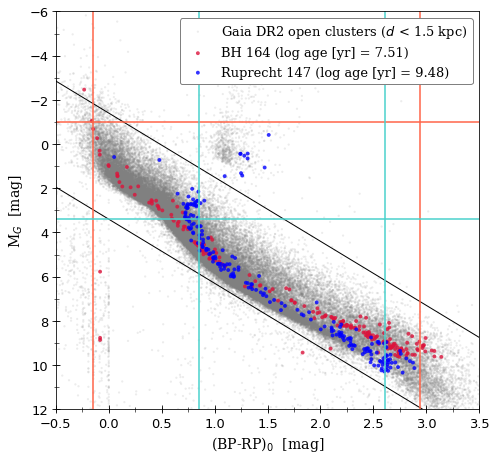

In [8]:
fig = plt.figure(figsize=(7,6.5))
ax  = plt.subplot(111)
xrange=(-0.5, 3.5)
yrange=(12., -6)
plt.axis([xrange[0], xrange[1], yrange[0], yrange[1]])
#plt.xscale('log')
#plt.xticks(fontsize=14)
#plt.yticks(np.arange(0.00, 0.75, step=0.1), fontsize=14)
#plt.tick_params(axis='x', which='minor')
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(1))
#plt.xlim(20, 2000)
#plt.ylim(0.00,0.75)
ax.tick_params(which="major", direction='inout', length=8.)
ax.tick_params(which="minor", direction='inout', length=5.)
ax.set_xlabel(r"(BP-RP)$_{0}$  [mag]", fontdict=font)
ax.set_ylabel(r"M$_{G}$  [mag]", fontdict=font)
#plt.title("Analysed open clusters", fontsize=16)

# Diagonal lines (cuts):
xpts_cuts = np.linspace(-0.5, 3.5, 1000)
plt.plot(xpts_cuts, 2.9*xpts_cuts-1.4, color="black", linewidth=1)
plt.plot(xpts_cuts, 2.9*xpts_cuts+3.4, color="black", linewidth=1)

# BH 164 cuts:
plt.axvline(-0.1448028, color='tomato', ls="-")  #, zorder=0
plt.axvline(2.9417117, color='tomato', ls="-")
plt.axhline(-1.0155664, color='tomato', ls="-")

# Ruprecht 147cuts:
plt.axvline(0.8485312, color='mediumturquoise', ls="-")  #, zorder=0
plt.axvline(2.6105898, color='mediumturquoise', ls="-")
plt.axhline(3.37, color='mediumturquoise', ls="-")

# Data and colour bar
sc = ax.scatter(Cantat_table_nearer_1point5kpc["BP_RP_zero"], Cantat_table_nearer_1point5kpc["M_G"],
                marker="o", color = "grey", edgecolor = "none", s=5, alpha = 0.15, 
                label="Gaia DR2 open clusters ($d$ < 1.5 kpc)")
sc = ax.scatter(Cantat_BH164["BP_RP_zero"], Cantat_BH164["M_G"],
                marker="o", color = "crimson", edgecolor = "none", s=15, alpha = 0.8,
                label=r"BH 164 (log age [yr] = 7.51)")
sc = ax.scatter(Tarricq_Ruprecht147["BP_RP_zero"], Tarricq_Ruprecht147["M_G"],
                marker="o", color = "blue", edgecolor = "none", s=15, alpha = 0.8,
                label=r"Ruprecht 147 (log age [yr] = 9.48)")

#plt.errorbar(catalogue_obs_CantatTarricq["nb_MS_members"], catalogue_obs_CantatTarricq["fb_50"],
#             yerr=catalogue_obs_CantatTarricq["nominal_fb_error"], fmt='o', color='black',
#             ecolor='lightgray', elinewidth=2, capsize=0)

def change_alpha(handle, original):
    ''' Change the alpha and marker style of the legend handles '''
    handle.update_from(original)
    handle.set_alpha(1)
    handle.set_marker('.')
    handle._legmarker.set_markersize(60)

plt.legend(prop={"family":"serif", 'size': 13}, framealpha=1.0, edgecolor="grey",
          handler_map={plt.Line2D: HandlerLine2D(update_func=change_alpha)}) #loc='upper left', bbox_to_anchor=(0.0, 0.86)
plt.tight_layout()
plt.savefig("im/CMD_2OCs_cuts.png", dpi=300)